In [2]:
!pip3 install pandas

In [3]:
!pip3 install seaborn


In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv('/Users/jatinbhatt/Desktop/venv/Fraud.csv')

# Step 3: Display the first few rows of the dataset
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
# Sample 10% of the dataset
df_sample = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Display the shape of the reduced dataset
print("Sampled dataset shape:", df_sample.shape)



Sampled dataset shape: (636262, 11)


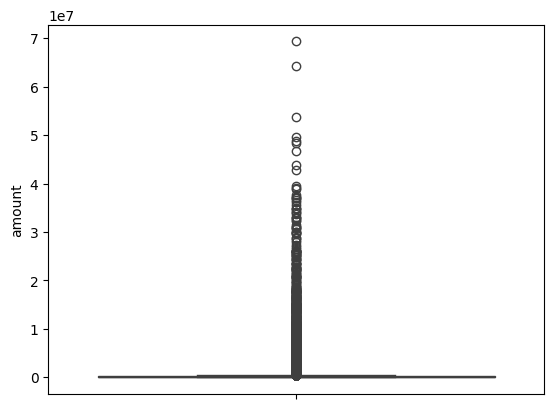

In [11]:
# Check for missing values
df_sample.isnull().sum()

# Get summary statistics of numerical columns
df_sample.describe()

# Checking for outliers in 'amount'
df_sample['amount'].describe()

# Plotting a boxplot for 'amount' to check for outliers
sns.boxplot(df_sample['amount'])
plt.show()


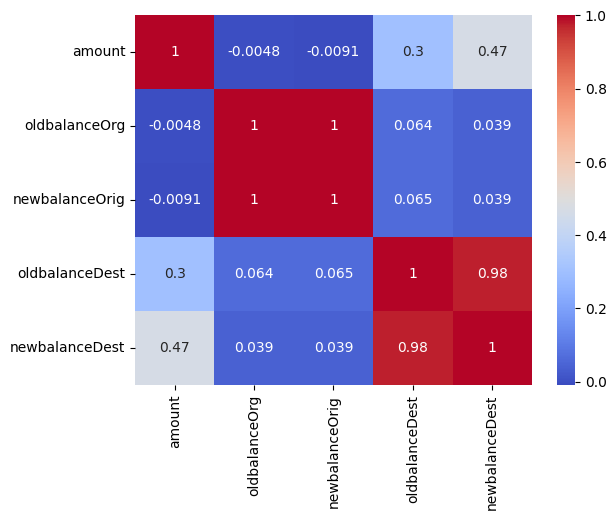

In [18]:
# Step 1: Creating new features for balance differences
df_sample['balanceOrigDiff'] = df_sample['newbalanceOrig'] - df_sample['oldbalanceOrg']
df_sample['balanceDestDiff'] = df_sample['newbalanceDest'] - df_sample['oldbalanceDest']

# Step 2: Check for multicollinearity using correlation matrix
corr = df_sample[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [13]:
!pip3 install scikit-learn


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Load the dataset
df = pd.read_csv('Fraud.csv')

# Display the original shape of the dataset
print("Original dataset shape:", df.shape)

# Step 2: Sample 10% of the dataset
df_sample = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Display the shape of the sampled dataset
print("Sampled dataset shape:", df_sample.shape)

# Step 3: Drop unnecessary columns (for example, 'nameOrig' and 'nameDest')
df_sample = df_sample.drop(['nameOrig', 'nameDest'], axis=1)

# Display the shape after dropping columns
print("Reduced dataset shape after dropping columns:", df_sample.shape)

# Step 4: Convert categorical variables to numeric using One-Hot Encoding
# Ensure the 'type' column is included for encoding
df_sample = pd.get_dummies(df_sample, columns=['type'], drop_first=True)

# Step 5: Create new features for balance differences
df_sample['balanceOrigDiff'] = df_sample['newbalanceOrig'] - df_sample['oldbalanceOrg']
df_sample['balanceDestDiff'] = df_sample['newbalanceDest'] - df_sample['oldbalanceDest']

# Step 6: Prepare features (X) and target variable (y)
X = df_sample.drop(['isFraud'], axis=1)  # Features
y = df_sample['isFraud']  # Target variable

# Check the data types of features in X to ensure all are numeric
print(X.dtypes)

# Check unique values in each column of X to find any non-numeric values
for col in X.columns:
    print(f"{col}: {X[col].unique()}")

# Step 7: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_val)

# Step 10: Model evaluation
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred))


Original dataset shape: (6362620, 11)
Sampled dataset shape: (636262, 11)
Reduced dataset shape after dropping columns: (636262, 9)
step                 int64
amount             float64
oldbalanceOrg      float64
newbalanceOrig     float64
oldbalanceDest     float64
newbalanceDest     float64
isFlaggedFraud       int64
type_CASH_OUT         bool
type_DEBIT            bool
type_PAYMENT          bool
type_TRANSFER         bool
balanceOrigDiff    float64
balanceDestDiff    float64
dtype: object
step: [278  15  10 403 206 259 188 139 230 544  45 163 211 302  18 322 158 131
 253 132 283  43 642 164 326  37   9 157 406 235 346  19 208 332 304 686
 226 201  14 323 225 138  41 399 120 373 179 369 275 396 162  22 229 234
 352 186 469 288 204 232 192  13 281 379 159 324 405 380 307 404  36 401
 228 236 297  12 300 564 254 181 356 203 178  11 255  35 542 240 325   8
 142 284 189 328 187 335 276 190  38 154 183 357 205 287 514 231 250 378
 349 252 161 202 354 333 571 257 353 155  20 305 348 301   